<a href="https://colab.research.google.com/github/VictoriaPedrozaAI/NLP-Projects/blob/main/Word2Vec_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Libraries

In [ ]:
!pip install --upgrade --force-reinstall gensim==4.3.3 numpy==1.26.4 scipy==1.13.1  pandas tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 30.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.2/509.2 kB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347

In [ ]:
import pandas as pd
import gensim
import nltk
from gensim.models import Word2Vec
import re
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx



nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

## Mount Drive - Mental Health Corpus


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Dataset from: https://www.kaggle.com/datasets/reihanenamdari/mental-health-corpus/data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/NLP - Project/Task 4/mental_health.csv')

In [ ]:
df.head(7)

,text,label
0,dear american teens question dutch person hear...,0
1,nothing look forward lifei dont many reasons k...,1
2,music recommendations im looking expand playli...,0
3,im done trying feel betterthe reason im still ...,1
4,worried year old girl subject domestic physic...,1
5,hey rredflag sure right place post this goes ...,1
6,feel like someone needs hear tonight feeling r...,0


In [ ]:
df.shape

(27977, 2)

In [ ]:
df.drop(columns=['label'], inplace=True)

## Pre-processing

In [ ]:

def preprocess_text_for_w2v(text):
    if not isinstance(text, str):
        return []

    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    words = word_tokenize(text)
    words = [word for word in words if len(word) > 1]

    return words

processed_corpus = []
for text in df['text'].fillna(''):
    tokens = preprocess_text_for_w2v(text)
    if tokens:
        processed_corpus.append(tokens)

In [ ]:
for i, sent in enumerate(processed_corpus[:5]):
    print(f"Sentence {i+1}: {sent}")

Sentence 1: ['dear', 'american', 'teens', 'question', 'dutch', 'person', 'heard', 'guys', 'get', 'way', 'easier', 'things', 'learn', 'age', 'us', 'sooooo', 'thth', 'graders', 'like', 'right', 'guys', 'learn', 'math']
Sentence 2: ['nothing', 'look', 'forward', 'lifei', 'dont', 'many', 'reasons', 'keep', 'going', 'feel', 'like', 'nothing', 'keeps', 'going', 'next', 'day', 'makes', 'want', 'hang', 'myself']
Sentence 3: ['music', 'recommendations', 'im', 'looking', 'expand', 'playlist', 'usual', 'genres', 'alt', 'pop', 'minnesota', 'hip', 'hop', 'steampunk', 'various', 'indie', 'genres', 'artists', 'people', 'like', 'cavetown', 'aliceband', 'bug', 'hunter', 'penelope', 'scott', 'various', 'rhymesayers', 'willing', 'explore', 'new', 'genresartists', 'such', 'anything', 'generic', 'rap', 'the', 'type', 'exclusively', 'sex', 'drugs', 'cool', 'rapper', 'is', 'rap', 'types', 'pretty', 'good', 'pop', 'popular', 'couple', 'years', 'ago', 'dunno', 'technical', 'genre', 'name', 'anyways', 'anyone',

## Train the model

In [ ]:
import os
print(f"Colab has {os.cpu_count()} CPU cores")

Colab has 2 CPU cores


In [ ]:
model = Word2Vec(
    sentences=processed_corpus,
    vector_size=50,
    window=5,
    min_count=2,
    workers=2,
    negative=10,
    epochs=10,
    sg=1
)

model.save("/content/drive/MyDrive/NLP - Project/Task 4/mental_health_word2vec.model")

### Model

In [ ]:
model = Word2Vec.load("/content/drive/MyDrive/NLP - Project/Task 4/mental_health_word2vec.model")

## Testing

### Similar words

In [ ]:
print(model.wv.most_similar("anxiety", topn=5))

print(model.wv.most_similar("therapy", topn=5))

[('depression', 0.9235852360725403), ('phobia', 0.9071962833404541), ('severe', 0.8851600885391235), ('generalized', 0.8707306981086731), ('anxietyi', 0.8678104877471924)]
[('counseling', 0.9149304628372192), ('medication', 0.8870735764503479), ('antidepressants', 0.8827188014984131), ('meds', 0.8787761926651001), ('electroconvulsive', 0.8719621896743774)]


### Cosine similarity

In [ ]:
sim = model.wv.similarity("depression", "sadness")
print(f"Similarity: {sim:.4f}")

sim = model.wv.similarity("happy", "depression")
print(f"Similarity: {sim:.4f}")

Similarity: 0.7210
Similarity: 0.5646


### Cosine Distance

In [ ]:
sim = model.wv.similarity("depression", "sadness")
print(f"Similarity: {sim:.4f}")

distance = 1 - sim
print(f"Distance:   {distance:.4f}")

Similarity: 0.7210
Distance:   0.2790


In [ ]:
sim = model.wv.similarity("happy", "depression")
print(f"Similarity: {sim:.4f}")

distance = 1 - sim
print(f"Distance:   {distance:.4f}")

Similarity: 0.5646
Distance:   0.4354


###Word Analogy

In [ ]:
model.wv.most_similar(positive=['therapy', 'infection'], negative=['anxiety'], topn=5)

[('hospitals', 0.7821546792984009),
 ('inpatient', 0.7627021670341492),
 ('hospital', 0.741848349571228),
 ('antipsychotic', 0.7088295221328735),
 ('antidepressants', 0.707214891910553)]

In [ ]:
model.wv.most_similar(positive=['therapist', 'hospital'], negative=['doctor'], topn=5)

[('inpatient', 0.8742865324020386),
 ('psych', 0.7955576181411743),
 ('involuntarily', 0.7880244255065918),
 ('hospitalized', 0.7838914394378662),
 ('discharged', 0.7607977986335754)]

### Clusters

In [ ]:
words = list(model.wv.key_to_index.keys())[:100]
vectors = np.array([model.wv[word] for word in words])

kmeans = KMeans(n_clusters=5, random_state=100, n_init=10)
clusters = kmeans.fit_predict(vectors)

for i in range(5):
    cluster_words = [words[j] for j in range(len(words)) if clusters[j] == i]
    print(f"\n Cluster {i+1}: {', '.join(cluster_words[:12])}")


 Cluster 1: get, one, even, ive, time, really, much, day, good, years, make, got

 Cluster 2: me, people, would, never, friends, things, someone, always, family, anyone, talk, say

 Cluster 3: im, like, want, know, feel, life, cant, it, think, going, go, dont

 Cluster 4: br, film, movie

 Cluster 5: filler


## Plots

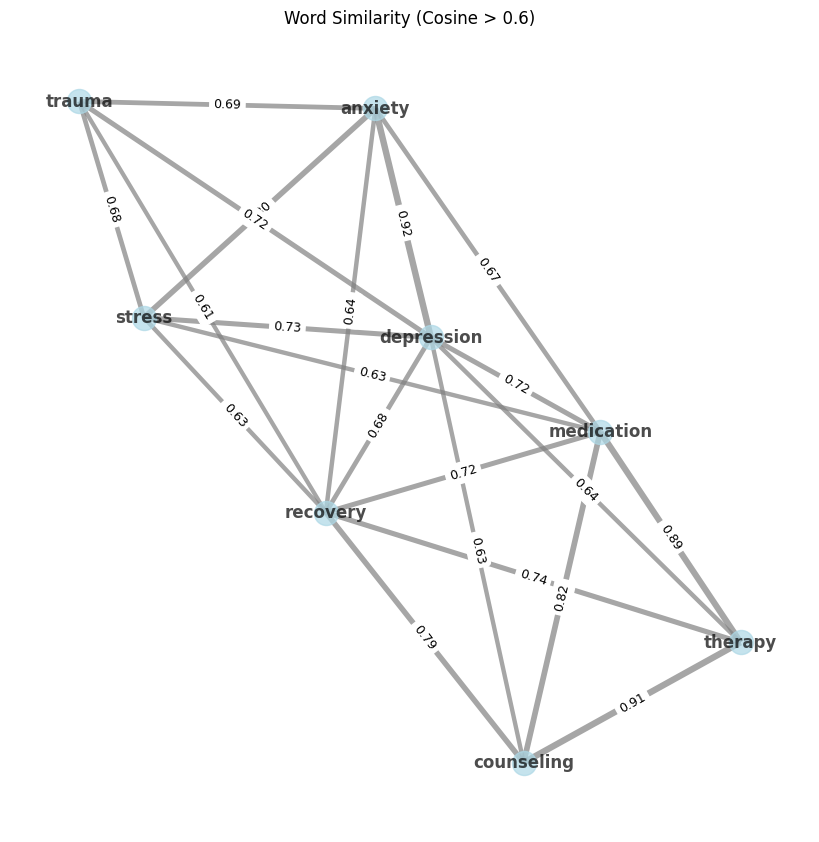

In [ ]:
words = ['anxiety', 'depression', 'therapy', 'stress', 'trauma', 'recovery', 'medication', 'counseling']
words = [w for w in words if w in model.wv]

G = nx.Graph()
threshold = 0.6

for i, w1 in enumerate(words):
    for w2 in words[i+1:]:
        sim = model.wv.similarity(w1, w2)
        if sim > threshold:
            G.add_edge(w1, w2, weight=sim)

pos = nx.spring_layout(G, seed=42)


plt.figure(figsize=(8, 8))
nx.draw(G, pos,
        with_labels=True, font_size=12, font_weight='bold',
        node_color="lightblue", edge_color="gray",
        width=[d['weight']*5 for (_, _, d) in G.edges(data=True)],
        alpha=0.7)


edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9)

plt.title("Word Similarity (Cosine > 0.6)")
plt.axis("off")
plt.show()

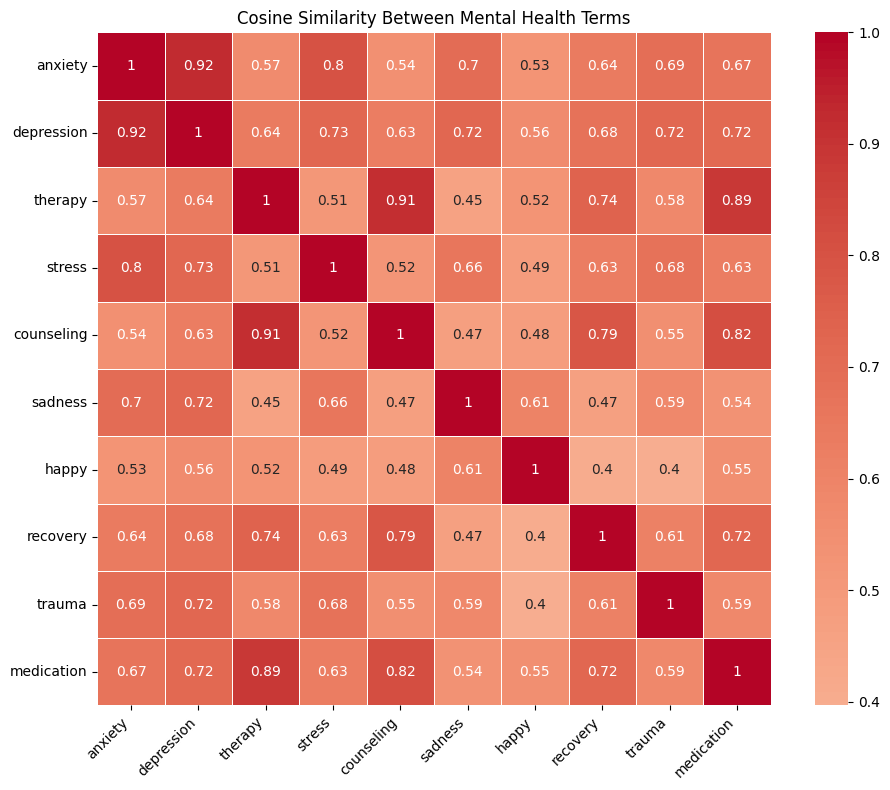

In [ ]:
words = ['anxiety', 'depression', 'therapy', 'stress', 'counseling',
         'sadness', 'happy', 'recovery', 'trauma', 'medication']

words_in_vocab = [word for word in words if word in model.wv]

similarity_matrix = np.zeros((len(words_in_vocab), len(words_in_vocab)))

for i, word1 in enumerate(words_in_vocab):
    for j, word2 in enumerate(words_in_vocab):
        similarity_matrix[i, j] = model.wv.similarity(word1, word2)

df_sim = pd.DataFrame(similarity_matrix, index=words_in_vocab, columns=words_in_vocab)

plt.figure(figsize=(10, 8))
sns.heatmap(df_sim, annot=True, cmap='coolwarm', center=0, square=True, linewidths=0.5)
plt.title('Cosine Similarity Between Mental Health Terms')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()